In [27]:
import tensorflow.keras as mod
import random
import collections
import numpy as np
import matplotlib.pyplot as plt
#import library

In [4]:
def display_random_images_with_labels(d, n=10):
    """
        accept dataset in tuple form, first index
        is np arrays (images) and second is labels
        and display n random images with labels
        from it
        Inputs:
            d (tuple): dataset images, dataset labels on same indexs
            n (int): number of samples to display (default: 10)
        Output:
            None
    """
    choices = list(range(len(d[0])))
    for i in range(n):
        index = random.choice(choices)
        choices.remove(index)
        print("index:",index)
        print("Lable:",d[1][index])
        plt.imshow(d[0][index], cmap='gray')
        plt.show()

In [5]:
from types import ModuleType
# Loading dataset
dataset = mod.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [6]:
#loading testing and training datasets
#count of training dataset
print("There are",len(dataset[0][0]),"images in training dataset")
#count of testing dataset
print("There are",len(dataset[1][0]),"images in training dataset")


There are 60000 images in training dataset
There are 10000 images in training dataset


In [13]:
# Display total Shape of the Images testing and traing
print('The Shape of the Traning Dataset: {}'.format(dataset[0][0].shape))
print('The Shape of the Testing Dataset: {}'.format(dataset[1][0].shape))

The Shape of the Traning Dataset: (60000, 28, 28)
The Shape of the Testing Dataset: (10000, 28, 28)


In [15]:
#printing the labels of training dataset
print("There are",len(dataset[0][1]),"labels in training dataset for",len(dataset[0][0]),"images in training dataset")
#printing the labels of training dataset
print("There are",len(dataset[1][1]),"labels in training dataset for",len(dataset[1][0]),"images in training dataset")


There are 60000 labels in training dataset for 60000 images in training dataset
There are 10000 labels in training dataset for 10000 images in training dataset


Randomly printing 10 images with labels from training dataset
index: 10328
Lable: 3


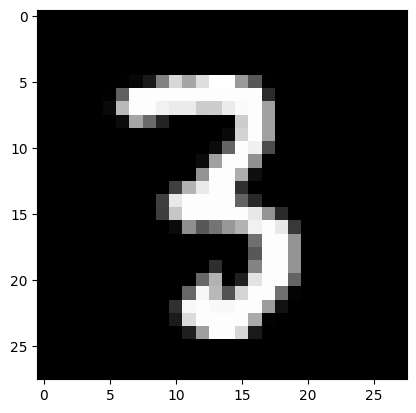

index: 17329
Lable: 7


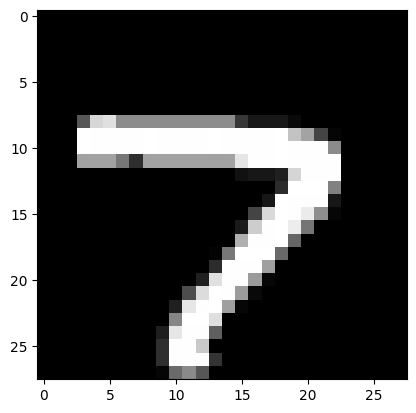

index: 28786
Lable: 2


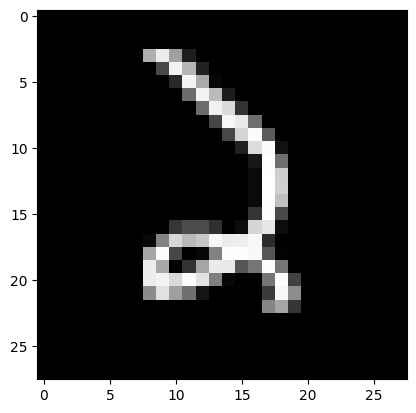

index: 5322
Lable: 4


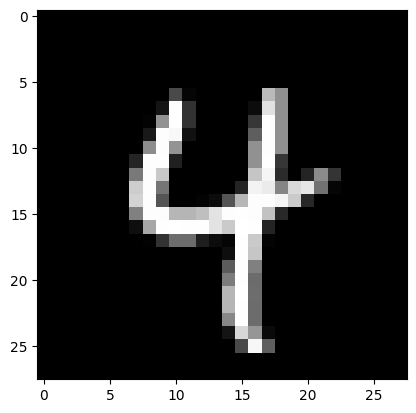

index: 45315
Lable: 0


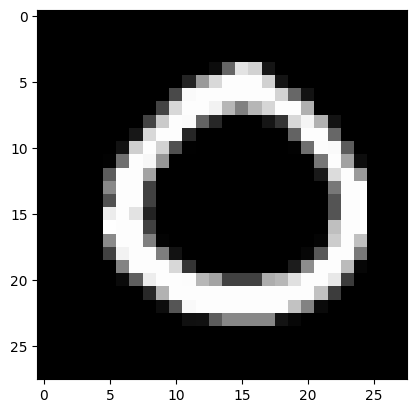

index: 7588
Lable: 1


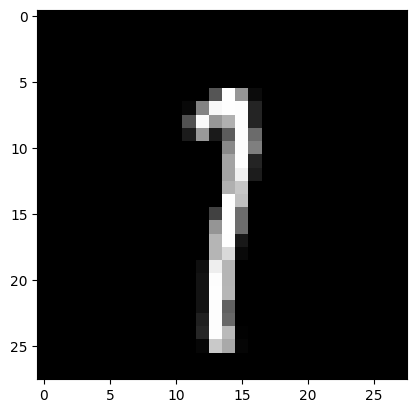

index: 4364
Lable: 6


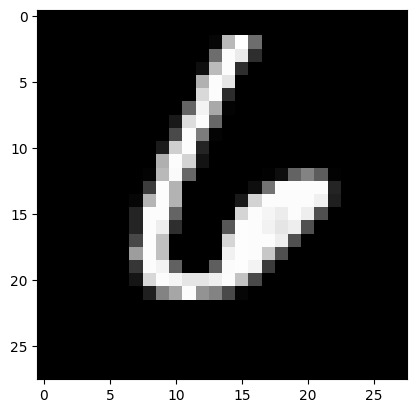

index: 5946
Lable: 7


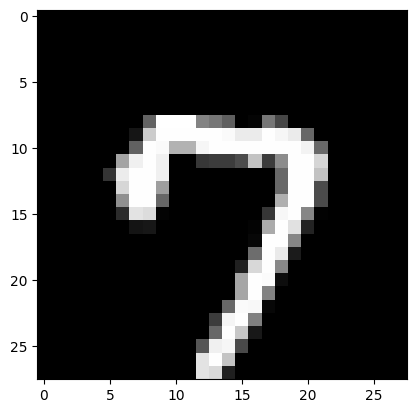

index: 11995
Lable: 1


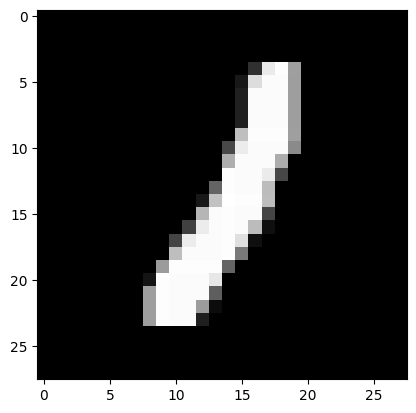

index: 25840
Lable: 5


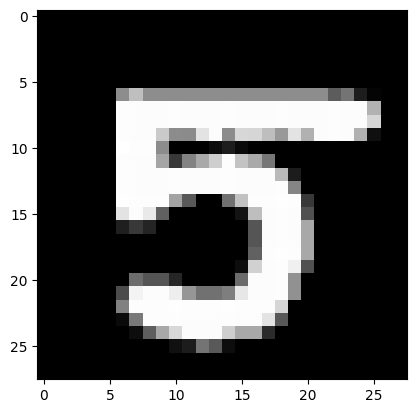

In [16]:
#Random 10 images with labels(training)
print("Randomly printing 10 images with labels from training dataset")
display_random_images_with_labels(dataset[0])

Randomly printing 10 images with labels from testing dataset
index: 1688
Lable: 6


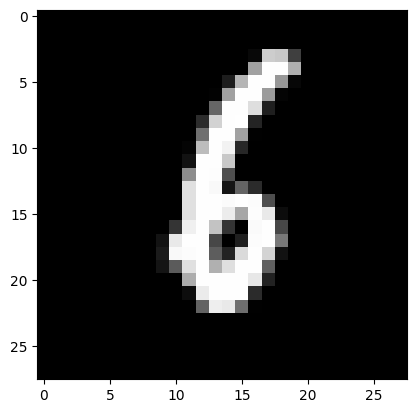

index: 5457
Lable: 1


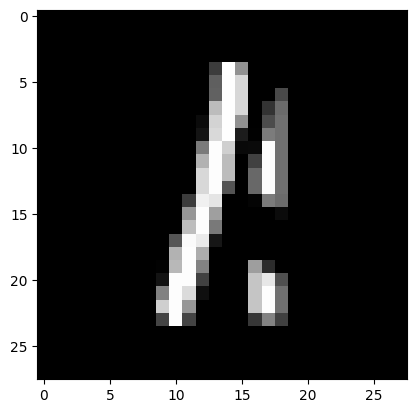

index: 2699
Lable: 2


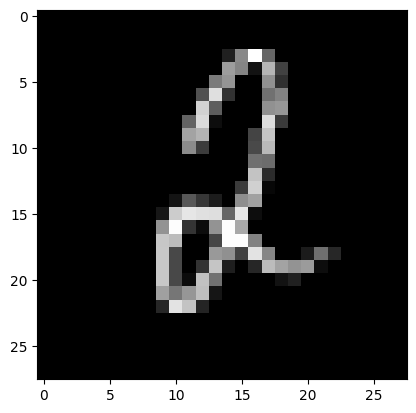

index: 4616
Lable: 9


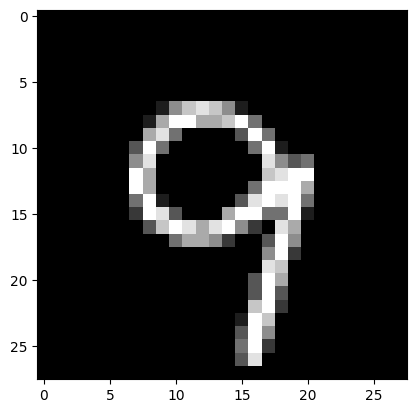

index: 4541
Lable: 3


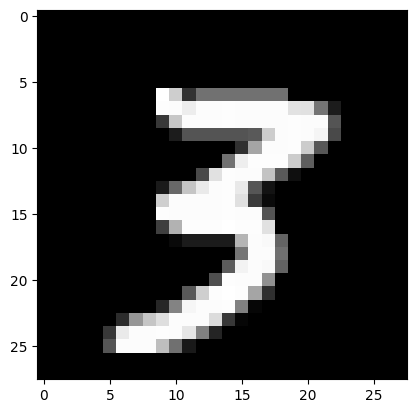

index: 767
Lable: 1


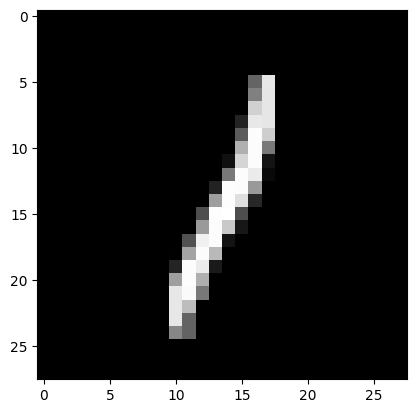

index: 4887
Lable: 0


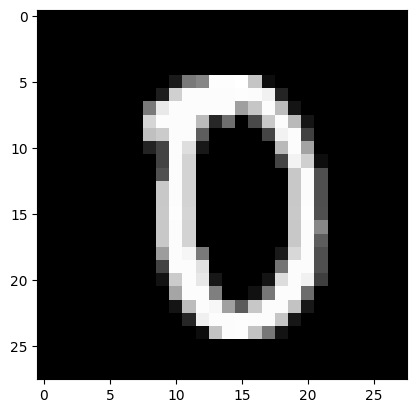

index: 6939
Lable: 2


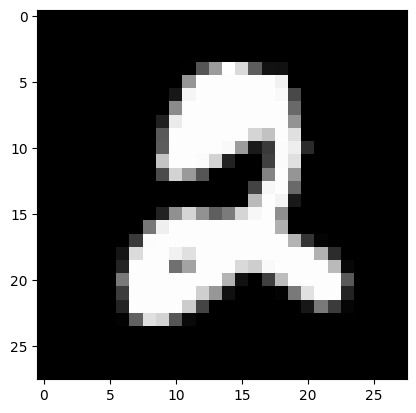

index: 6900
Lable: 6


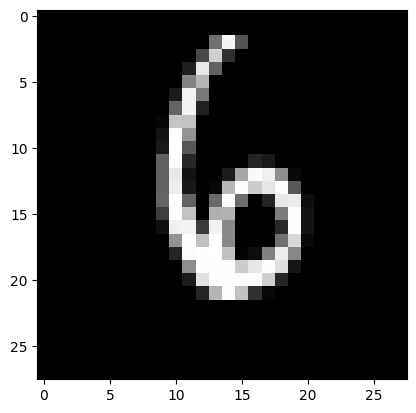

index: 3841
Lable: 4


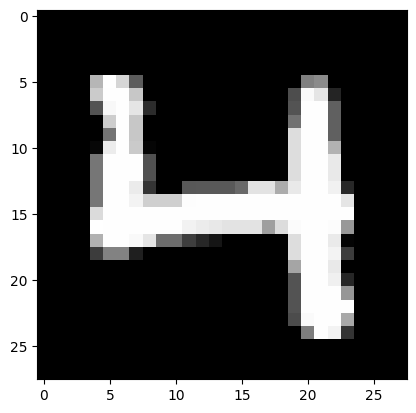

In [17]:
#Random 10 images with labels(testing)
print("Randomly printing 10 images with labels from testing dataset")

display_random_images_with_labels(dataset[1])

In [18]:
#10 unique classes in training dataset
print("There are", len(set(dataset[0][1])),"unique classes in training dataset")
print("Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)")
#count of labels
display(collections.Counter(dataset[0][1]))




There are 10 unique classes in training dataset
Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)


Counter({5: 5421,
         0: 5923,
         4: 5842,
         1: 6742,
         9: 5949,
         2: 5958,
         3: 6131,
         6: 5918,
         7: 6265,
         8: 5851})

In [19]:
#10 unique classes in validation dataset
print("There are", len(set(dataset[1][1])),"unique classes in validation dataset")
print("Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)")
#count of labels
display(collections.Counter(dataset[1][1]))

There are 10 unique classes in validation dataset
Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)


Counter({7: 1028,
         2: 1032,
         1: 1135,
         0: 980,
         4: 982,
         9: 1009,
         5: 892,
         6: 958,
         3: 1010,
         8: 974})

**Reduction of dataset to 10 times**

In [20]:
# Loading dataset
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

# Function to reduce dataset size
def reduce_dataset(images, labels, num_images_per_label):
    reduced_images = []
    reduced_labels = []

    unique_labels = np.unique(labels)

    for label in unique_labels:
        # Get indices of all images with the current label
        label_indices = np.where(labels == label)[0]

        # Randomly select the desired number of images for the current label
        selected_indices = np.random.choice(label_indices, num_images_per_label, replace=False)

        # Add the selected images and labels to the reduced dataset
        reduced_images.extend(images[selected_indices])
        reduced_labels.extend(labels[selected_indices])

    return np.array(reduced_images), np.array(reduced_labels)

# Desired number of images per label for training and testing datasets as asked in question
num_images_per_label_train = 600
num_images_per_label_test = 100

# Reduce the training and testing datasets
reduced_train_images, reduced_train_labels = reduce_dataset(train_images, train_labels, num_images_per_label_train)
reduced_test_images, reduced_test_labels = reduce_dataset(test_images, test_labels, num_images_per_label_test)

In [ ]:
# reduced dataset is assigned in new_dataset
#It consists of two tuplesone for the reduced training data and labels and another for the reduced testing data and labels.
new_dataset = ((reduced_train_images, reduced_train_labels), (reduced_test_images, reduced_test_labels))

In [21]:
#finding the new dataset shape after reduction
print(new_dataset[0][0][0].shape)

(28, 28)


In [22]:
#checking training labels after reduction
print("There are",len(new_dataset[0][1]),"labels in training dataset for",len(new_dataset[0][0]),"images in training dataset")
print("There are",len(new_dataset[1][1]),"labels in training dataset for",len(new_dataset[1][0]),"images in training dataset")


There are 6000 labels in training dataset for 6000 images in training dataset
There are 1000 labels in training dataset for 1000 images in training dataset


In [23]:
#unique classes in training  after reduction
print("There are", len(set(new_dataset[0][1])),"unique classes in training dataset")
print("Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)")
display(collections.Counter(new_dataset[0][1]))

There are 10 unique classes in training dataset
Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)


Counter({0: 600,
         1: 600,
         2: 600,
         3: 600,
         4: 600,
         5: 600,
         6: 600,
         7: 600,
         8: 600,
         9: 600})

In [24]:
#unique classes in validation after reduction
print("There are", len(set(new_dataset[1][1])),"unique classes in validation dataset")
print("Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)")

display(collections.Counter(new_dataset[1][1]))

There are 10 unique classes in validation dataset
Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)


Counter({0: 100,
         1: 100,
         2: 100,
         3: 100,
         4: 100,
         5: 100,
         6: 100,
         7: 100,
         8: 100,
         9: 100})

Randomly printing 10 images with labels from training dataset
index: 2082
Lable: 3


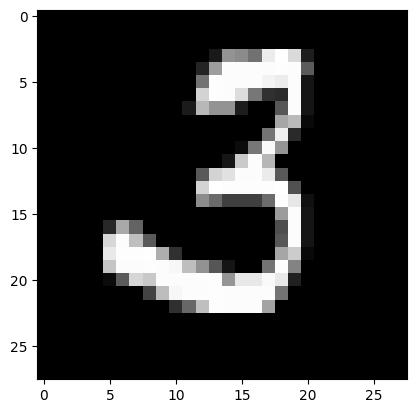

index: 2407
Lable: 4


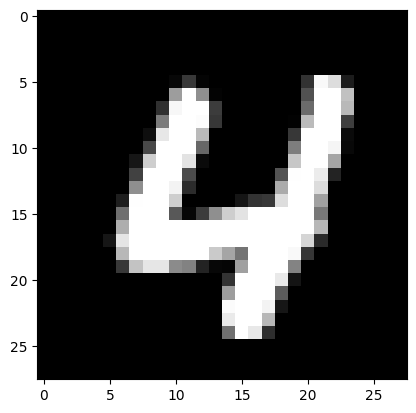

index: 4765
Lable: 7


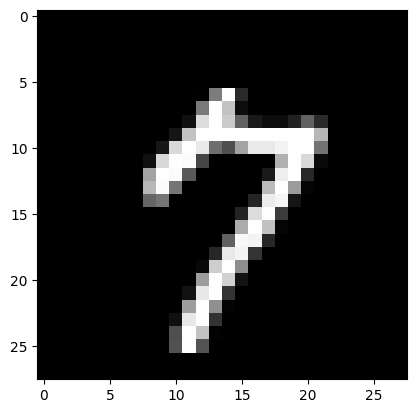

index: 465
Lable: 0


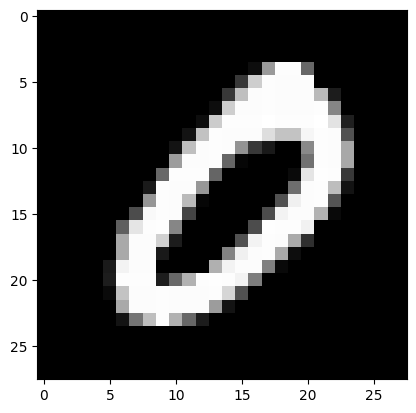

index: 4756
Lable: 7


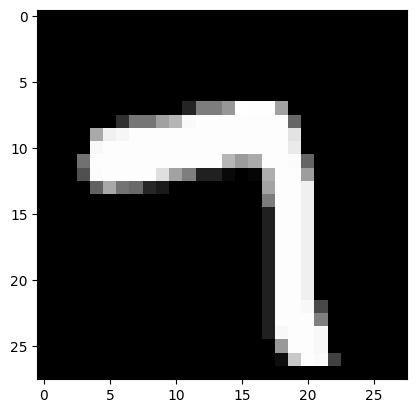

index: 1410
Lable: 2


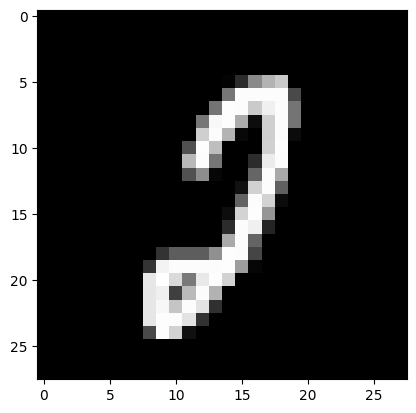

index: 3034
Lable: 5


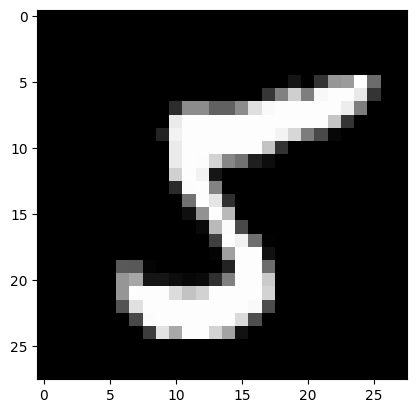

index: 1484
Lable: 2


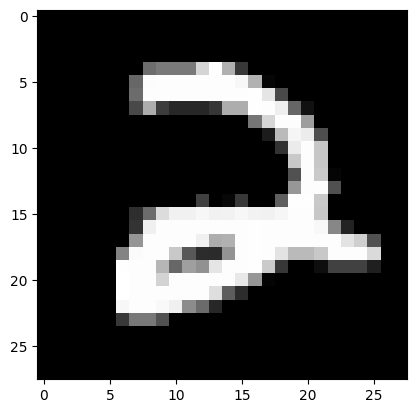

index: 3430
Lable: 5


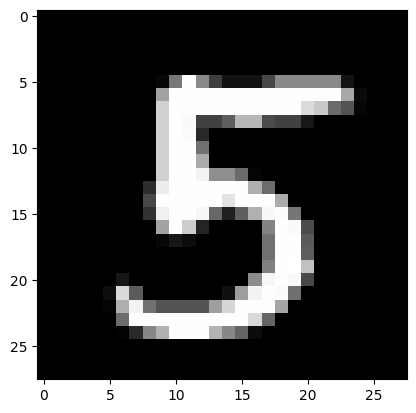

index: 3339
Lable: 5


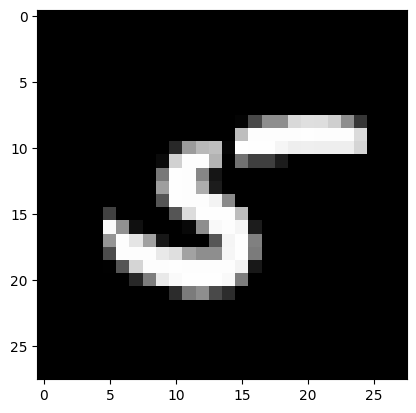

In [25]:
print("Randomly printing 10 images with labels from training dataset")
display_random_images_with_labels(new_dataset[0])

Randomly printing 10 images with labels from testing dataset
index: 2536
Lable: 4


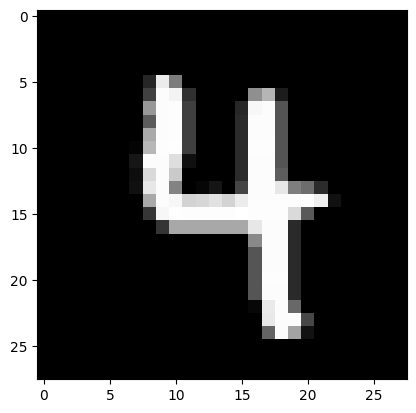

index: 3783
Lable: 6


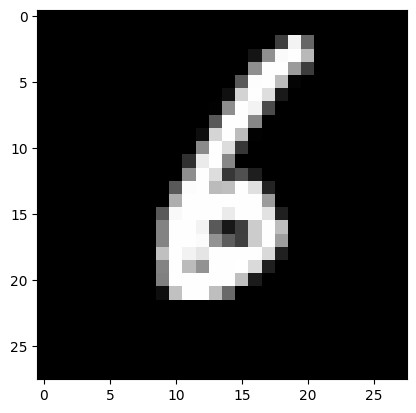

index: 3057
Lable: 5


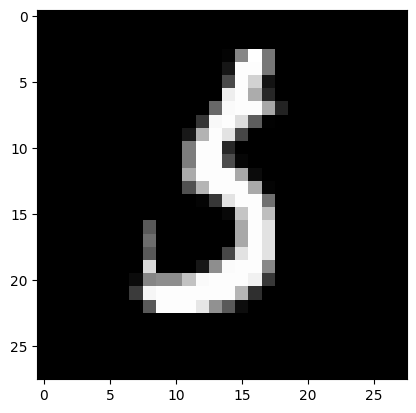

index: 5659
Lable: 9


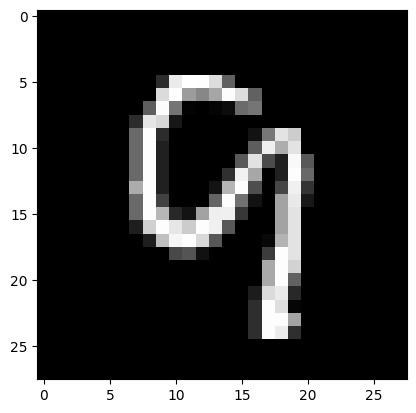

index: 1855
Lable: 3


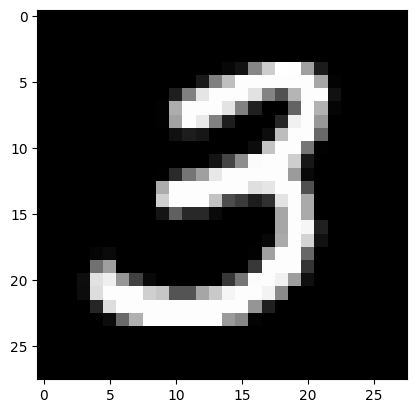

index: 5748
Lable: 9


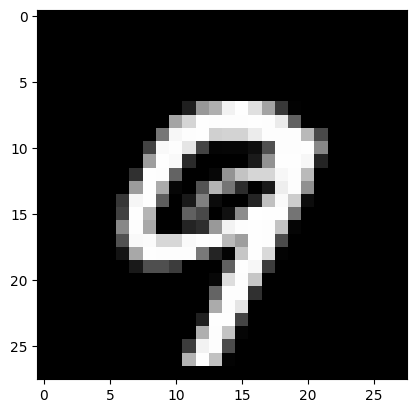

index: 4973
Lable: 8


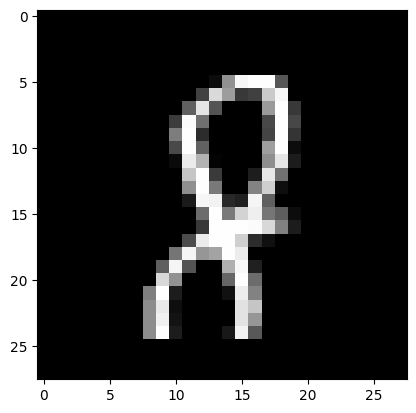

index: 5025
Lable: 8


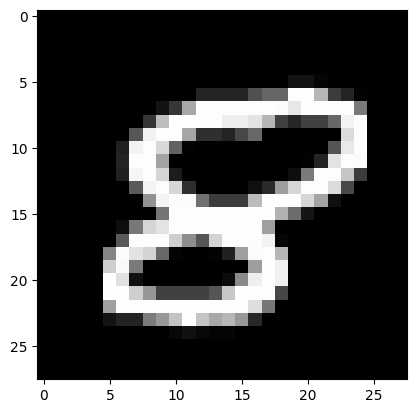

index: 1481
Lable: 2


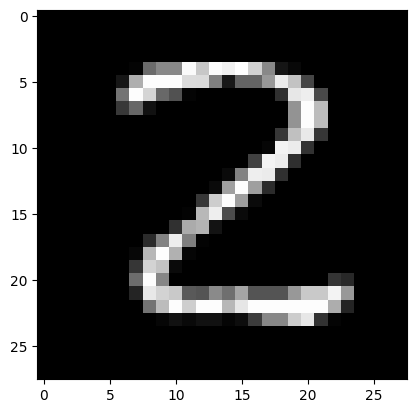

index: 554
Lable: 0


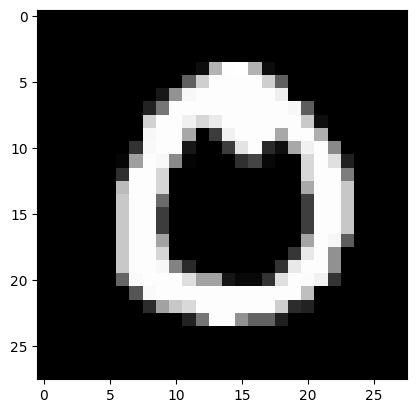

In [26]:
print("Randomly printing 10 images with labels from testing dataset")


display_random_images_with_labels(new_dataset[0])
